# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import warnings

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

#### Observations: There are 1898 rows and 9 columns present in the data.


In [ ]:
# Write your code here
df.shape


(1898, 9)

In [ ]:
'''
Observations: There are 1898 rows and 9 columns present in the data.
'''

'\nObservations: There are 1898 rows and 9 columns present in the data.\n'

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
'''
Observations: there are different datatypes present in the dataset as:
int64: integr values that can be treated as whole numbers. this is the data type for columns such as order_id,cudtomer_id, food_preparation_time, and delivery_time.

float64: representing floating-point numbers. This is the case for the "cost_of_the_order" column.

object: This datatype represents strings or mixed types. Columns with this data type can store text or a combination of text and numeric values.In this dataset columns such as restaurant_name, cuisine_type, day_of_the_week, and rating have object datatype.
'''



```
# This is formatted as code
```

#### Observations: there are different datatypes present in the dataset as:

int64: integr values that can be treated as whole numbers. this is the
data type for columns such as order_id,cudtomer_id, food_preparation_time, and delivery_time.

float64: representing floating-point numbers. This is the case for the "cost_of_the_order" column.

object:  This datatype represents strings or mixed types. Columns with this data type can store text or a combination of text and numeric values.In this dataset columns such as restaurant_name, cuisine_type, day_of_the_week, and rating have object datatype.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# replacing all "Not given" values with NaN
df['rating'].replace('Not given', np.nan, inplace=True)

In [ ]:
'''Here, I utilized the .isnull() function to assess the presence of missing
values across each column in the dataset. While the output indicated no missing data,
further examination revealed numerous instances of "Not given" values within the "rating" column,
potentially signifying missing values. This discrepancy arises because the .isnull() function inherently
fails to identify "Not given" as a missing value.
To ensure the dataset's integrity and facilitate robust statistical analysis, it is imperative to
identify and address these values as missing. As a solution, I will replace all
occurrences of "Not given" with "NaN" (Not a Number), allowing the .isnull() function to correctly
recognize them as missing values. This approach will enhance the reliability of subsequent statistical analyses. '''

#### Observations:


Here, I utilized the .isnull() function to assess the presence of missing values across each column in the dataset. While the output indicated no missing data, further examination revealed numerous instances of "Not given" values within the "rating" column, potentially signifying missing values. This discrepancy arises because the .isnull() function inherently fails to identify "Not given" as a missing value.

To ensure the dataset's integrity and facilitate robust statistical analysis, it is imperative to identify and address these values as missing. As a solution, I will replace all occurrences of "Not given" with "NaN" (Not a Number), allowing the .isnull() function to correctly recognize them as missing values. This approach will enhance the reliability of subsequent statistical analyses.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162,3,5,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [ ]:
'''
The df.describe() method is employed to obtain a comprehensive statistical summary of the dataset. Upon analysis, it is
 revealed that the minimum time required for food preparation is 20 minutes,
 while the maximum duration extends to 35 minutes.
'''

#### Observations:
The df.describe() method is employed to obtain a comprehensive statistical summary of the dataset. Upon analysis, it is revealed that the minimum time required for food preparation is 20 minutes, while the maximum duration extends to 35 minutes.

### **Question 5:** How many orders are not rated?

In [46]:
# Write the code here
df['rating'].isnull().sum()

736

In [ ]:
'''Upon review of the statistical summary, it is observed that there are 1162 numerical
values present in the 'rating' column. This suggests that out of the total 1898 orders, 736 have not been assigned a rating.
Alternatively, one may verify this by utilizing the .isnull() function
on the 'rating' column, which yields the same outcome.'''

#### Observations:
Upon review of the statistical summary, it is observed that there are 1162 numerical values present in the 'rating' column. This suggests that out of the total 1898 orders, 736 have not been assigned a rating.

Alternatively, one may verify this by utilizing the .isnull() function on the 'rating' column, which yields the same outcome.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [47]:
# Write the code here
df['order_id'].nunique()

1898

In [48]:
df['customer_id'].nunique()

1200

In [49]:
df['restaurant_name'].nunique()



178

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

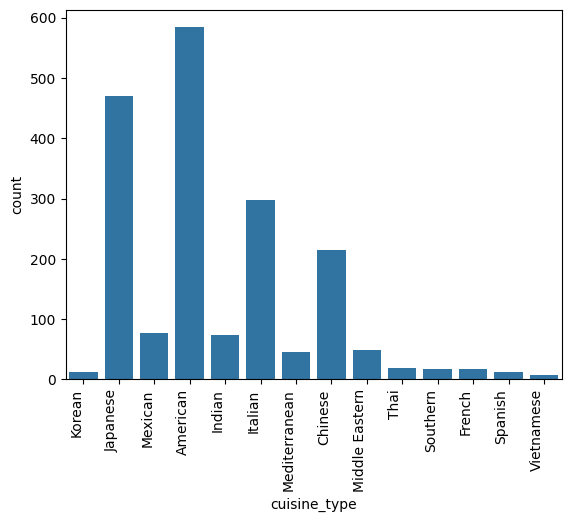

In [75]:
df['cuisine_type'].nunique()
ax = sns.countplot(data=df, x='cuisine_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

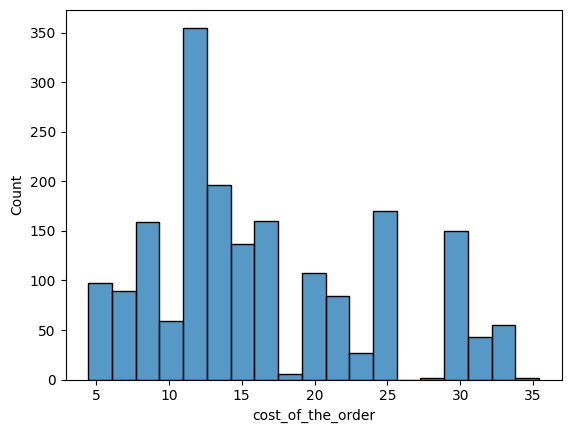

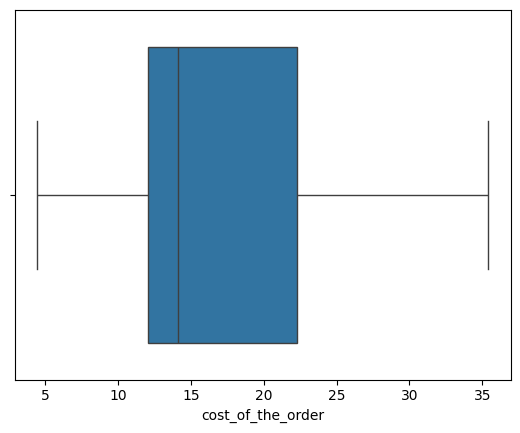

In [60]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [51]:
df['day_of_the_week'].nunique()



2

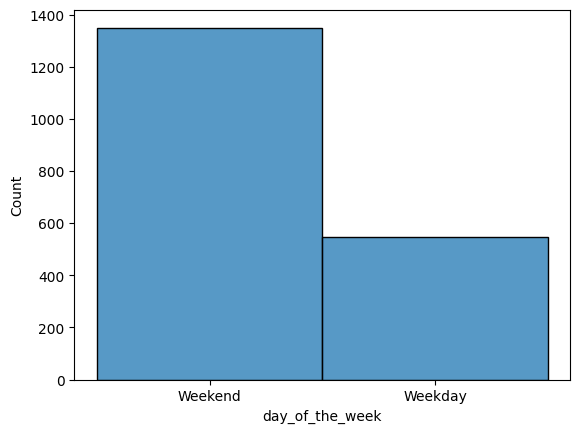

In [61]:
sns.histplot(data=df,x='day_of_the_week')
plt.show()

In [ ]:
df['rating'].nunique()

3

<Axes: xlabel='rating', ylabel='Count'>

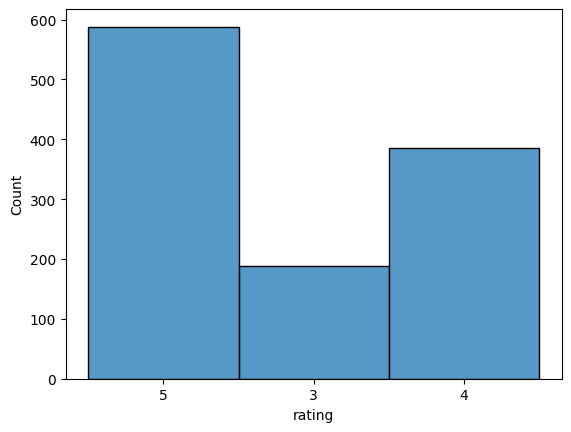

In [62]:
sns.histplot(data=df,x='rating')

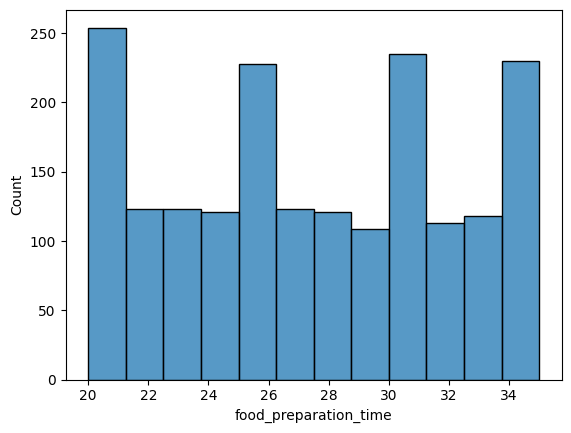

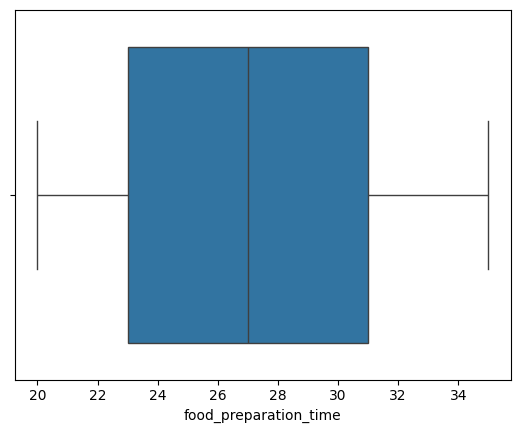

In [63]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

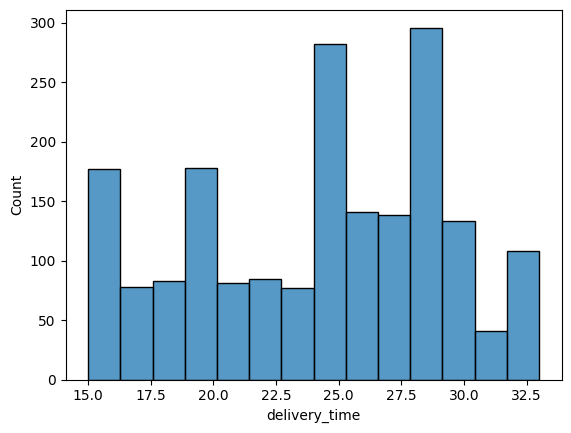

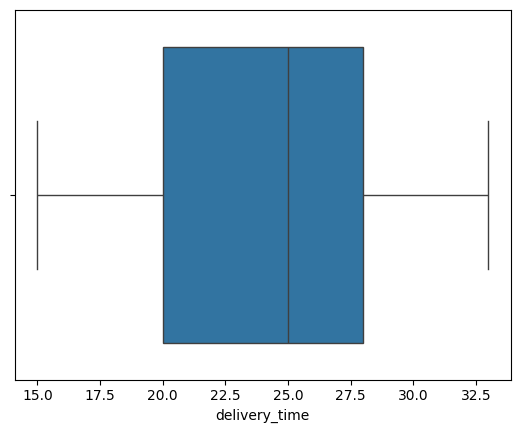

In [64]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

In [ ]:
'''Some observations on different columns of the data:

order_id: There are 1898 unique order IDs, as expected, since each row corresponds to a single order and requires its own unique identifier.

customer_id: There are 1200 unique customer IDs, indicating that these 1898 orders were placed by 1200 distinct customers.

restaurant_name: There are 178 unique restaurant names, indicating that orders were placed at 178 different restaurants.

cuisine_type: There are 14 different cuisine types represented in the orders, with American, Japanese, and Italian cuisines being the most frequently ordered, respectively.

cost_of_the_order: The median order cost is approximately $14.

day_of_the_week: The number of orders placed on weekends is approximately twice that of weekdays, suggesting that people are more inclined to order food on weekends.

rating: There are three unique rating values (excluding missing values), including 3, 4, and 5. The highest count is for a rating of 5.

food_preparation_time: The distribution of food preparation time is almost symmetric, with a mean and median of approximately 27 minutes.

delivery_time: The distribution of delivery time is slightly left-skewed.

'''

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [52]:
# Write the code here
freq_restaurants = df['restaurant_name'].value_counts()
freq_restaurants.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
'''Utilizing the .value_counts() method, it becomes
evident that Shake Shack, The Meatball Shop, BlueRibbon Sushi, Blue Ribbon Fried Chicken, and Parm are
among the top five restaurants that garner the highest number of orders.'''

'Utilizing the .value_counts() method, it becomes \nevident that Shake Shack, The Meatball Shop, BlueRibbon Sushi, Blue Ribbon Fried Chicken, and Parm are \namong the top five restaurants that garner the highest number of orders.'

#### Observations: Utilizing the .value_counts() method, it becomes evident that Shake Shack, The Meatball Shop, BlueRibbon Sushi, Blue Ribbon Fried Chicken, and Parm are among the top five restaurants that garner the highest number of orders.







### **Question 8**: Which is the most popular cuisine on weekends?

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

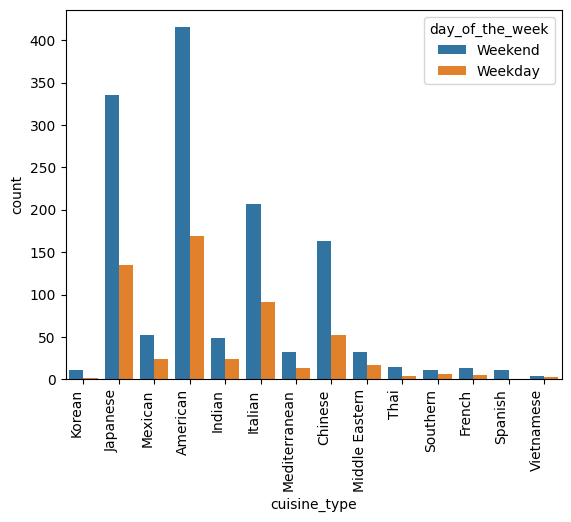

In [53]:
# Write the code here
# Method1
ax = sns.countplot(data=df, x='cuisine_type',hue='day_of_the_week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


In [65]:
# Filter the DataFrame for rows where "day_of_the_week" is "weekend"
#Method 2

# Filter the DataFrame for rows where "day_of_the_week" is "weekend"
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Perform value counts for "cuisine_type" on the filtered DataFrame
cuisine_counts_weekend = weekend_orders['cuisine_type'].value_counts()

# Display the value counts
cuisine_counts_weekend.head()


American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [ ]:
'''
American cuisine emerges as the most favored choice during weekends. Various methods can
be employed to substantiate this observation. Firstly, employing a categorical histplot with
 the 'hue' parameter showcases the preference for American cuisine during weekends. Additionally, in the second method, a new DataFrame is
created exclusively for weekend orders, followed by a value count analysis on
 the cuisine_type column within this subset.
'''

"\nAmerican cuisine emerges as the most favored choice during weekends. Various methods can \nbe employed to substantiate this observation. Firstly, employing a categorical histplot with\n the 'hue' parameter showcases the preference for American cuisine during weekends. Additionally, in the second method, a new DataFrame is \ncreated exclusively for weekend orders, followed by a value count analysis on\n the cuisine_type column within this subset.\n"

#### Observations: American cuisine emerges as the most favored choice during weekends. Various methods can be employed to substantiate this observation. Firstly, employing a categorical histplot with the 'hue' parameter showcases the preference for American cuisine during weekends. Additionally, in the second method, a new DataFrame is created exclusively for weekend orders, followed by a value count analysis on the cuisine_type column within this subset.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [66]:
# Write the code here
morethan20_orders = df[df['cost_of_the_order'] > 20]
percent=(morethan20_orders.shape[0]/df.shape[0])*100
print(percent)

29.24130663856691


In [ ]:
'''
Based on the provided code snippet, it can be inferred that approximately 29.2% of the orders have a cost exceeding $20.
'''

#### Observations:
Based on the provided code snippet, it can be inferred that approximately 29.2% of the orders have a cost exceeding $20.


### **Question 10**: What is the mean order delivery time?

In [67]:
# Write the code here
mean_deliverytime=df['delivery_time'].mean()
print(mean_deliverytime)

24.161749209694417


In [ ]:
''' The mean of delivery time is about 24.16 min.'''

#### Observations: The mean of delivery time is about 24.16 min.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [56]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

the value_counts() function can be used for this purpose. Based on the results, customers with id 52832,47440, and 83287 have the highest orders as 13,10 and 9 respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

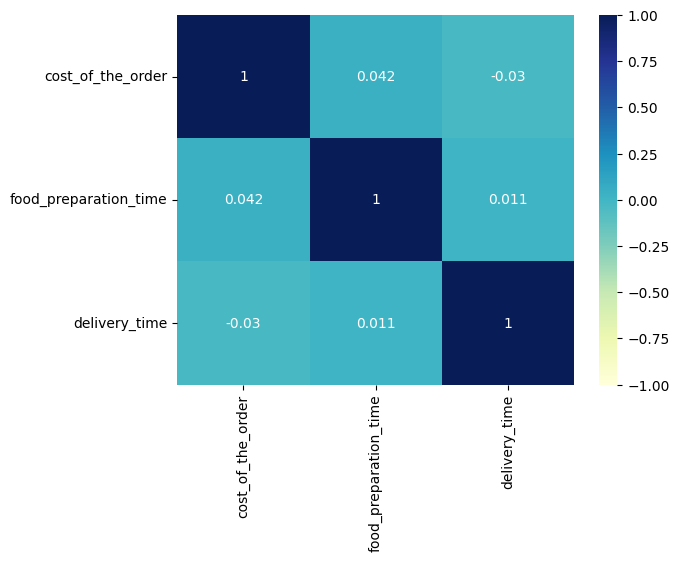

In [68]:
# Write the code here
numerical=['cost_of_the_order','food_preparation_time','delivery_time']
sns.heatmap(data=df[numerical].corr(), annot=True,vmin=-1, vmax=1, cmap='YlGnBu');

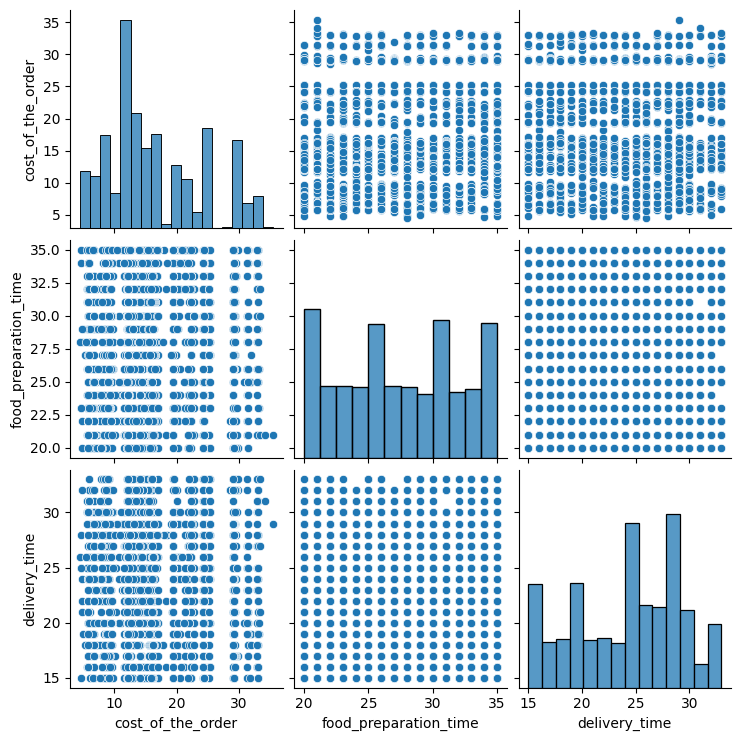

In [ ]:
sns.pairplot(data=df[numerical])

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

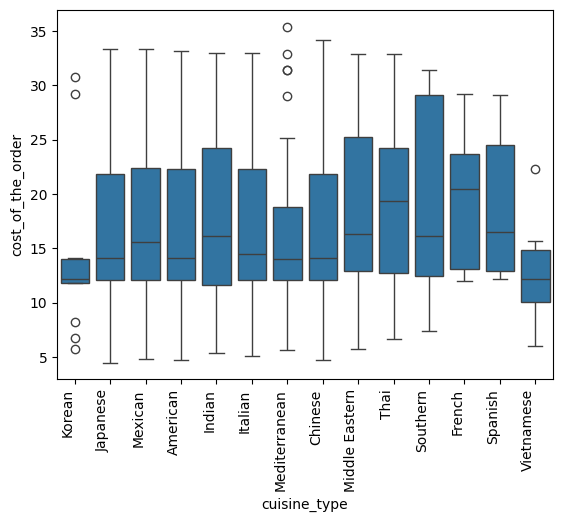

In [ ]:
ax = sns.boxplot(data=df, x='cuisine_type',y='cost_of_the_order');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

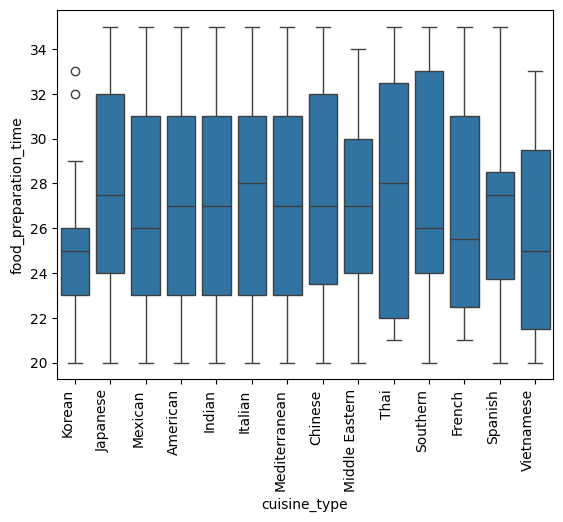

In [69]:
ax = sns.boxplot(data=df, x='cuisine_type',y='food_preparation_time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, 'Korean'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'Mexican'),
 Text(3, 0, 'American'),
 Text(4, 0, 'Indian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Mediterranean'),
 Text(7, 0, 'Chinese'),
 Text(8, 0, 'Middle Eastern'),
 Text(9, 0, 'Thai'),
 Text(10, 0, 'Southern'),
 Text(11, 0, 'French'),
 Text(12, 0, 'Spanish'),
 Text(13, 0, 'Vietnamese')]

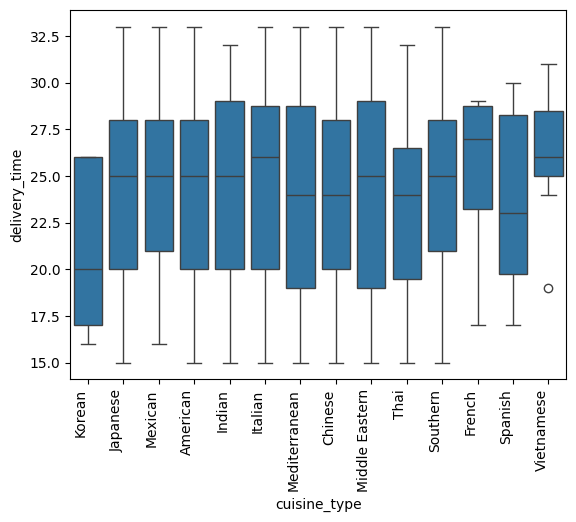

In [ ]:
ax = sns.boxplot(data=df, x='cuisine_type',y='delivery_time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')]

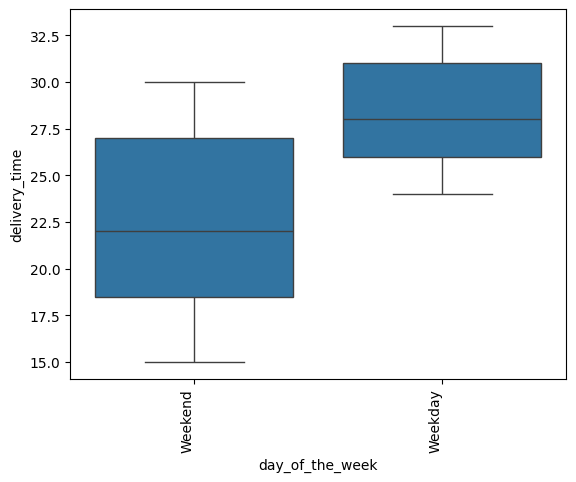

In [ ]:
ax = sns.boxplot(data=df, x='day_of_the_week',y='delivery_time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, '5'), Text(1, 0, '3'), Text(2, 0, '4')]

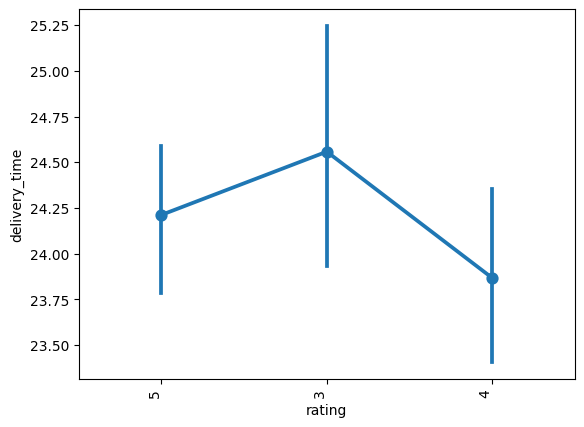

In [ ]:
ax = sns.pointplot(data=df, x='rating',y='delivery_time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, '5'), Text(1, 0, '3'), Text(2, 0, '4')]

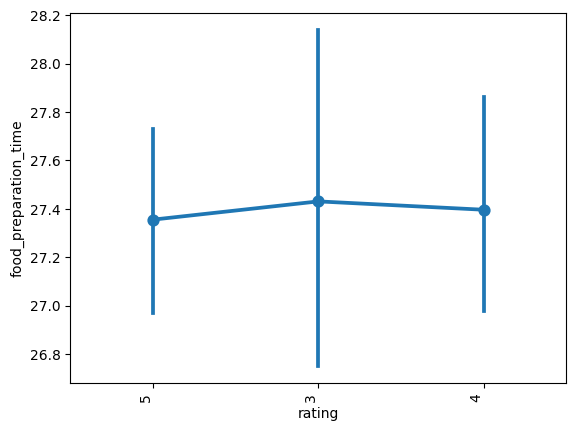

In [ ]:
ax = sns.pointplot(data=df, x='rating',y='food_preparation_time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

[Text(0, 0, '5'), Text(1, 0, '3'), Text(2, 0, '4')]

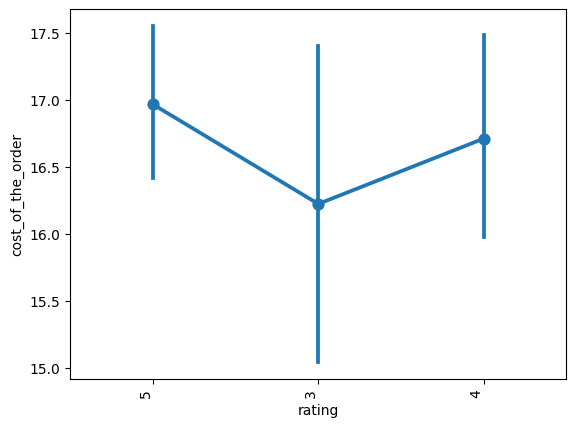

In [ ]:
ax = sns.pointplot(data=df, x='rating',y='cost_of_the_order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

In [ ]:
'''
Correlation Analysis: A heatmap showcasing the correlation between numerical values such
as 'cost_of_the_order', 'food_preparation_time', and 'delivery_time' suggests
no significant correlation among these variables. This observation is
corroborated by pairplots, where no clear trend is visually discernible between any two of these variables.

Categorical and Numerical Analysis:

The median cost for French foods surpasses that of others, while Korean and Vietnamese cuisines exhibit the lowest medians.
 Outlier values are notably observed for Korean, Mediterranean, and Vietnamese foods.
Italian and Thai cuisines necessitate more preparation time compared to other cuisines, while Korean and Vietnamese foods require less time.
The median delivery time for Korean cuisine is notably lower than others.
Longer delivery times are typically observed on weekdays compared to weekends, possibly attributed to increased traffic congestion.
Analysis of delivery time versus rating indicates a general trend of lower ratings associated with longer delivery times.
Food preparation time appears to have minimal impact on customer ratings, as depicted by the plot of preparation time versus rating.
A discernible trend is noted in the plot of food cost versus rating, where cheaper foods tend to garner lower ratings.
'''


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [71]:
# Write the code here

df2=df[df['rating'].notnull()].copy()
df2['rating'] = df2['rating'].astype('int')

count_ratings = df2.groupby('restaurant_name')['rating'].count().reset_index()
df3 = df2[df2['restaurant_name'].isin(count_ratings[count_ratings['rating'] > 50]['restaurant_name'])].copy()
df3.groupby(['restaurant_name'])['rating'].mean()


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

In [ ]:
'''
Based on the code above, four restaurants have the necessary conditions for the promotional offer:
1-Blue Ribbon Fried Chicken
2-Blue Ribbon Sushi
3-Shake Shack
4-The Meatball Shop
'''

#### Observations: Based on the code above, four restaurants have the necessary conditions for the promotional offer:
1-Blue Ribbon Fried Chicken
2-Blue Ribbon Sushi
3-Shake Shack
4-The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [72]:
# Write the code here
df4=df.copy()
for index, row in df4.iterrows():
    if row['cost_of_the_order'] > 20:
        df4.loc[index, 'Charge'] = (25/100) * row['cost_of_the_order']
    elif row['cost_of_the_order'] > 5:
        df4.loc[index, 'Charge'] = (15/100) * row['cost_of_the_order']
    else:
        df4.loc[index, 'Charge'] = 0

net_revenue=df4['Charge'].sum()
print('$',net_revenue)





$ 6166.303


In [ ]:
'''
The net revenue generated by the company is $6166.303
'''

#### Observations:
The net revenue generated by the company is $ 6166.303.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [73]:
# Write the code here
df5=df.copy()
df5['T_time']=df5['delivery_time']+df5['food_preparation_time']
df5=df5[df5['T_time']>60]
print((df5.shape[0]/df.shape[0])*100)




10.537407797681771


In [ ]:
'''
about 10.53 % of total orders have total time more than 60 min.'''

'\nabout 10.53 % of total orders have total time more than 60 min.'

#### Observations:
about 10.53 % of total orders have total time more than 60 min.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [74]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [ ]:
'''
weekday delivery time is about 28.34 min, and weekend delivery time is 22.47 min.
 Results show that in general food delivery takes longer in weekdays.'''

#### Observations: weekday delivery time is about 28.34 min, and weekend delivery time is 22.47 min. Results show that in general food delivery takes longer in weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions: Here are a few main conclusions based on the data:
*  American, Japanese, and Italian cuisines emerge as popular choices among customers
*   Weekday delivery times tend to be longer compared to weekends.

*   The number of orders placed on weekends is approximately twice that of weekdays, suggesting that people are more inclined to order food on weekends.

*   Delivery time appears to influence customer ratings, with longer delivery times often associated with lower ratings.
*   Contrary to delivery time, there is no significant correlation between average food preparation time and rating.

* Interestingly, the data suggests that orders with lower average costs tend to receive lower ratings. This trend implies that customers may prioritize quality over price, expressing greater satisfaction with higher-quality, albeit pricier, orders compared to cheaper, lower-quality alternatives.








### Recommendations: Here are some recomendations based on the conclusions:

*  Expand the restaurant selection to include more establishments offering American, Japanese, and Italian cuisines, given their popularity among customers. Introducing new dishes or variations within these cuisines could further attract clientele. Additionally, to drive interest in other cuisines, consider implementing promotional strategies such as discounts, complimentary delivery, and other incentives to entice customers to explore diverse culinary options.


*   To capitalize on the weekend surge in food orders, consider offering weekend-exclusive deals and promotions to attract more customers during this peak period. Additionally, to boost orders on weekdays, consider implementing weekday-specific promotions, such as lunchtime discounts or loyalty rewards for weekday orders. This can incentivize customers to choose your service throughout the week, balancing demand and maximizing revenue potential across all days of the week

*  Focus on improving delivery efficiency, especially during weekdays, to minimize delivery times. Implement strategies such as route optimization, staffing adjustments, or partnerships with delivery service providers to expedite delivery processes.

*   Place a strong emphasis on maintaining food quality during transit to mitigate the impact of longer delivery times on customer satisfaction. Implement quality control measures and training programs for delivery personnel to ensure consistency in food quality.

*  Enhance the overall customer experience by providing real-time delivery updates, personalized recommendations, and proactive resolution of delivery-related issues. Engage with customers through feedback channels to understand their preferences and address concerns promptly.

*   Emphasize the value proposition of higher-priced menu items by highlighting their superior quality and taste. Educate customers about the sourcing of ingredients, culinary expertise, and preparation techniques to justify the premium pricing and foster trust and loyalty.



*   Establish partnerships with upscale restaurants known for their high-quality cuisine, even if their prices are slightly higher, rather than selecting cheaper options with lower-quality food. This is because customers are willing to pay more for better quality food, which can lead to increased satisfaction and loyalty

*   Develop targeted promotional campaigns or loyalty programs to incentivize customers to explore higher-quality menu options. Offer discounts, complimentary items, or exclusive dining experiences to encourage trial and repeat purchases.











---